# Proyecto Grupal: Análisis de circuito para Electromiografía

Con el fin de realizar un circuito que pueda obtener las señales eléctricas de los músculos, se realizó el estudio de un shield de Arduino que se aplica en proyectos que utilizan señales electromiográficas. Este circuito utiliza un filtro que el autor decidió llamar Besselworth ya que, se dice, une las mejores características de los filtros tipo Bessel y Butterworth.
Nos propusimos entonces, en primer lugar, comparar este filtro normalizado con un Bessel y un Butterworth del mismo orden del que aparece en los planos del shield en el que nos basamos.

Para poder comparar realmente estos circuitos primero tuvimos que desnormalizar el filtro bajo estudio para llevarlos a todos a una frecuencia de corte comun, en este caso decidimos que w sea igual a 1 rad/seg. Una vez hecho esto se comparan dos puntos de interés, la atenuación y el retardo de grupo en dicho punto.

## Primer comparación.

Como primera instancia obtuvimos la transferencia del filtro extraído de los esquemáticos con el simulador Tina, de aquí pudimos tomar los coeficientes de la transferencia para usarlos en el script de python.

![Besselworth_1_transf](./images/circuits/Besselworth_1_transf.png)

Se puede ver en el código a continuación que los coeficientes están multiplicados por un factor (fc\*2\*np.pi) y elevado al grado correspondiente al término, esto se hizo para normalizar el filtro a wc = 1.

*Coeficientes de la transferencia Besselworth NORMALIZADA:

	Numerador:
		2.455
		3476.204
	Denominador:
		1.000
		407.269
		2503.167
		5530.302
		3476.204


*Polos y ceros de la transferencia Besselworth NORMALIZADA:

	Polos:
		-401.062+0.000j
		-2.591+1.320j
		-2.591-1.320j
		-1.025+0.000j
	Ceros:
		-1415.969



**_____Para w = 1[rad/seg] los valores obtenidos son:_____**

Nombre del filtro  Atenuación [dB] Retardo de Grupo [seg]
------------------ --------------- ----------------------
       Butter ord4         -3.0105                 3.6957
       Bessel ord4         -3.0104                 2.0757
Besselworth ord4-1         -3.5227                 1.0960





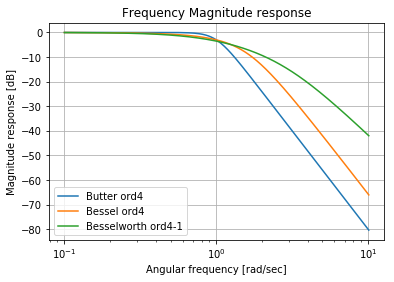

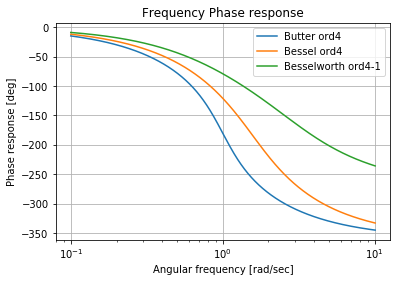

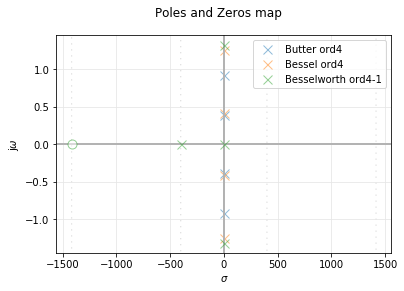

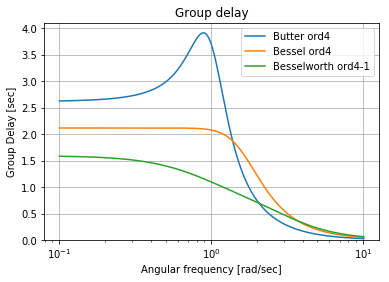

In [2]:
#!/usr/bin/env python2
# -*- coding: utf-8 -*-
"""
Created on Thu Sep 20 18:30:41 2018

@author: tiago
"""
import numpy as np
import scipy.signal as sig
#import matplotlib as mpl
from splane import analyze_sys


#vectores auxiliares para imprimir los graficos de los sistemas
all_sys = []
filter_names = []

# Constantes del filtro Besselworth
fc = 40

# Constatens del filtro Butterworth y Bessel
order2analyze = 4


#____________Butter____________

z,p,k = sig.buttap(order2analyze)

num, den = sig.zpk2tf(z,p,k)

all_sys.append(sig.TransferFunction(num,den))

filter_names.append('Butter ord'+str(order2analyze))



#____________Bessel____________

z,p,k = sig.besselap(order2analyze, norm='mag')

num, den = sig.zpk2tf(z,p,k)

all_sys.append(sig.TransferFunction(num,den))

filter_names.append('Bessel ord'+str(order2analyze))



#____________Besselworth____________

#Coeficientes de la transferencia obtenida con Tina normalizada con C4 = 1uF (1)
num = [(2.81*10**(-6))*(fc*2*np.pi), 1]
den = [(7.21*10**(-14))*((fc*2*np.pi)**4), (7.38*10**(-9))*((fc*2*np.pi)**3), 
       (1.14*10**(-5))*((fc*2*np.pi)**2), (6.33*10**(-3))*(fc*2*np.pi), 1]

tf = sig.TransferFunction(num, den)

 

print ("*Coeficientes de la transferencia Besselworth NORMALIZADA:\n")
print ("\tNumerador:")
for c in tf.num:
    print(f"\t\t{c:.3f}")
print ("\tDenominador:")
for c in tf.den:
    print(f"\t\t{c:.3f}")
print ("\n")

print ("*Polos y ceros de la transferencia Besselworth NORMALIZADA:\n")
print ("\tPolos:")
for c in tf.poles:
    print(f"\t\t{c:.3f}")
print ("\tCeros:")
for c in tf.zeros:
    print(f"\t\t{c:.3f}")


all_sys.append(tf)
filter_names.append("Besselworth ord" + str(order2analyze) + "-1")

#Defino el rango a imprimir y el punto a mostrar
ini = 0.1
end = 10.1
n = 100000
bode_lenght = np.linspace(ini, end, n)
printW = 1
#imprimo todos los Bode
analyze_sys( all_sys, filter_names, bode_lenght, printW=printW)

Teniendo en cuenta los datos y gráficos que se obtienen en Python se puede ver que si bien la atenuación en la frecuencia de corte es mas de 3dB para el Besselworth, el retardo de grupo no es 100% constante en esa zona. Es importante destacar que el retardo de grupo no es constante y que, incluso, es peor que el del filtro Bessel, lo cual da una idea de que quizás se desempeñaría mejor un filtro Bessel común en vez de un Besselworth si lo que nos interesa mantener esta variable controlada.

Como variante a este circuito se nos ocurrió cambiar el valor del capacitor C4 y ver que pasaba con las curvas de atenuación y de retardo de grupo. Se eligió variar el valor de este capacitor ya que es el que determina, en gran parte, la posición del polo en -1.025+0.000j.

Es así como definimos tres circuitos diferentes. El primero (número 1) es el que se encuentra en los esquemáticos con C4 = 1uF, el segundo (número 2) con un C4 = 100nF y el tercero (numero 3) con un C4 = 10nF.

## Segunda comparación (C4 = 100nF).

Aplicando los cambios mencionados, la transferencia del circuito queda de la siguiente manera:

![Besselworth_2_transf](./images/circuits/Besselworth_2_transf.png)

Llevando estos valores a Python tenemos los siguientes resultados:

*Coeficientes de la transferencia Besselworth NORMALIZADA:

	Numerador:
		24.550
		34762.043
	Denominador:
		1.000
		416.099
		6235.961
		24637.365
		34762.043


*Polos y ceros de la transferencia Besselworth NORMALIZADA:

	Polos:
		-400.688+0.000j
		-10.264+0.000j
		-2.573+1.354j
		-2.573-1.354j
	Ceros:
		-1415.969



**_____Para w = 1[rad/seg] los valores obtenidos son:_____**

Nombre del filtro  Atenuación [dB] Retardo de Grupo [seg]
------------------ --------------- ----------------------
       Butter ord4         -3.0105                 3.6957
       Bessel ord4         -3.0104                 2.0757
Besselworth ord4-2         -0.6406                 0.6914





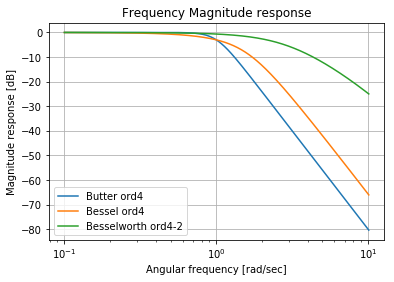

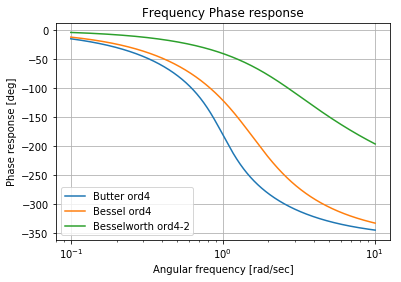

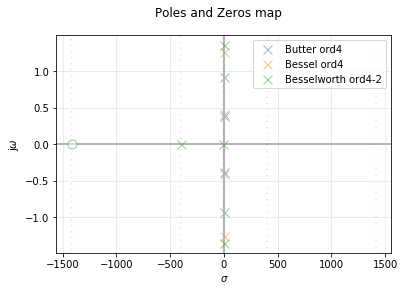

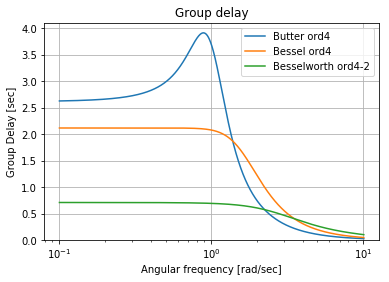

In [3]:
#!/usr/bin/env python2
# -*- coding: utf-8 -*-
"""
Created on Thu Sep 20 18:30:41 2018

@author: tiago
"""
import numpy as np
import scipy.signal as sig
#import matplotlib as mpl
from splane import analyze_sys


#vectores auxiliares para imprimir los graficos de los sistemas
all_sys = []
filter_names = []

# Constantes del filtro Besselworth
fc = 40

# Constatens del filtro Butterworth y Bessel
order2analyze = 4


#____________Butter____________

z,p,k = sig.buttap(order2analyze)

num, den = sig.zpk2tf(z,p,k)

all_sys.append(sig.TransferFunction(num,den))

filter_names.append('Butter ord'+str(order2analyze))



#____________Bessel____________

z,p,k = sig.besselap(order2analyze, norm='mag')

num, den = sig.zpk2tf(z,p,k)

all_sys.append(sig.TransferFunction(num,den))

filter_names.append('Bessel ord'+str(order2analyze))



#____________Besselworth____________

#Coeficientes de la transferencia obtenida con Tina normalizada con C4 = 100nf (2)
num = [(2.81*10**(-6))*(fc*2*np.pi), 1]
den = [(7.21*10**(-15))*((fc*2*np.pi)**4), (7.54*10**(-10))*((fc*2*np.pi)**3),
       (2.84*10**(-6))*((fc*2*np.pi)**2), (2.82*10**(-3))*(fc*2*np.pi), 1]

tf = sig.TransferFunction(num, den)

 

print ("*Coeficientes de la transferencia Besselworth NORMALIZADA:\n")
print ("\tNumerador:")
for c in tf.num:
    print(f"\t\t{c:.3f}")
print ("\tDenominador:")
for c in tf.den:
    print(f"\t\t{c:.3f}")
print ("\n")

print ("*Polos y ceros de la transferencia Besselworth NORMALIZADA:\n")
print ("\tPolos:")
for c in tf.poles:
    print(f"\t\t{c:.3f}")
print ("\tCeros:")
for c in tf.zeros:
    print(f"\t\t{c:.3f}")


all_sys.append(tf)
filter_names.append("Besselworth ord" + str(order2analyze) + "-2")

#Defino el rango a imprimir y el punto a mostrar
ini = 0.1
end = 10.1
n = 100000
bode_lenght = np.linspace(ini, end, n)
printW = 1
#imprimo todos los Bode
analyze_sys( all_sys, filter_names, bode_lenght, printW=printW)

Se pueden ver cambios bastante notorios en la atenuación y el retardo de grupo. En este caso la atenuación en w = 1 no superó los 0.6406dB mientras que el retardo de grupo mejoró en las cercanías de dicha frecuencia.

## Tercer comparación (C4 = 10nF).

Para el tercer circuito la transferencia queda de la siguiente manera:

![Besselworth_3_transf](./images/circuits/Besselworth_3_transf.png)

Y los estos valores aplicados a Python dan los siguientes resultados:

*Coeficientes de la transferencia Besselworth NORMALIZADA:

	Numerador:
		245.500
		347620.433
	Denominador:
		1.000
		508.258
		43476.063
		215795.364
		347620.433


*Polos y ceros de la transferencia Besselworth NORMALIZADA:

	Polos:
		-401.239+0.000j
		-101.843+0.000j
		-2.588+1.345j
		-2.588-1.345j
	Ceros:
		-1415.969



**_____Para w = 1[rad/seg] los valores obtenidos son:_____**

Nombre del filtro  Atenuación [dB] Retardo de Grupo [seg]
------------------ --------------- ----------------------
       Butter ord4         -3.0105                 3.6957
       Bessel ord4         -3.0104                 2.0757
Besselworth ord4-3         -0.6035                 0.6034





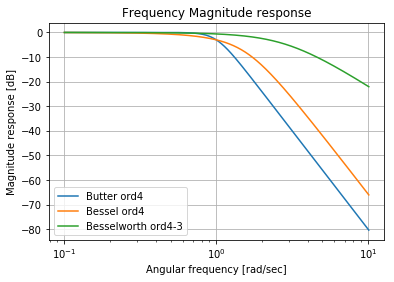

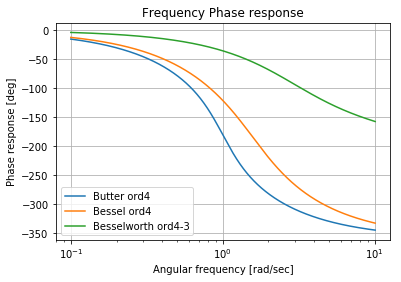

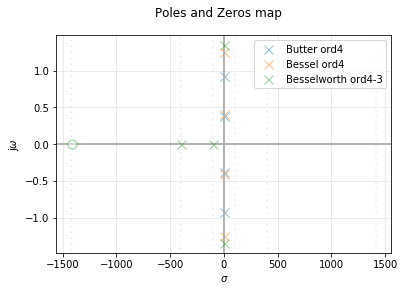

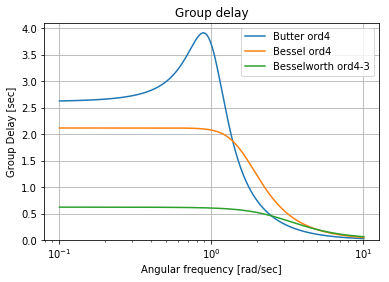

In [4]:
#!/usr/bin/env python2
# -*- coding: utf-8 -*-
"""
Created on Thu Sep 20 18:30:41 2018

@author: tiago
"""
import numpy as np
import scipy.signal as sig
#import matplotlib as mpl
from splane import analyze_sys


#vectores auxiliares para imprimir los graficos de los sistemas
all_sys = []
filter_names = []

# Constantes del filtro Besselworth
fc = 40

# Constatens del filtro Butterworth y Bessel
order2analyze = 4


#____________Butter____________

z,p,k = sig.buttap(order2analyze)

num, den = sig.zpk2tf(z,p,k)

all_sys.append(sig.TransferFunction(num,den))

filter_names.append('Butter ord'+str(order2analyze))



#____________Bessel____________

z,p,k = sig.besselap(order2analyze, norm='mag')

num, den = sig.zpk2tf(z,p,k)

all_sys.append(sig.TransferFunction(num,den))

filter_names.append('Bessel ord'+str(order2analyze))



#____________Besselworth____________

#Coeficientes de la transferencia obtenida con Tina normalizada con C4 = 10nf (3)
num = [(2.81*10**(-6))*(fc*2*np.pi), 1]
den = [(7.21*10**(-16))*((fc*2*np.pi)**4), (9.21*10**(-11))*((fc*2*np.pi)**3),
       (1.98*10**(-6))*((fc*2*np.pi)**2), (2.47*10**(-3))*(fc*2*np.pi), 1]

tf = sig.TransferFunction(num, den)

 

print ("*Coeficientes de la transferencia Besselworth NORMALIZADA:\n")
print ("\tNumerador:")
for c in tf.num:
    print(f"\t\t{c:.3f}")
print ("\tDenominador:")
for c in tf.den:
    print(f"\t\t{c:.3f}")
print ("\n")

print ("*Polos y ceros de la transferencia Besselworth NORMALIZADA:\n")
print ("\tPolos:")
for c in tf.poles:
    print(f"\t\t{c:.3f}")
print ("\tCeros:")
for c in tf.zeros:
    print(f"\t\t{c:.3f}")


all_sys.append(tf)
filter_names.append("Besselworth ord" + str(order2analyze) + "-3")

#Defino el rango a imprimir y el punto a mostrar
ini = 0.1
end = 10.1
n = 100000
bode_lenght = np.linspace(ini, end, n)
printW = 1
#imprimo todos los Bode
analyze_sys( all_sys, filter_names, bode_lenght, printW=printW)

Se puede ver que la variación de los parametros calculados sigue la misma tendencia, la atenuación baja a expensas de un retardo de grupo mas constante en las cercanías de la frecuencia de corte, pero con menor diferencia con respecto al segundo circuito.

## Comparación de los tres circuitos propuestos.

Como último paso se decidió comparar los tres circuitos para ver sus diferencias.



_______________________________________________________________________
**Filtro 1 (C4 = 1uF)**

*Coeficientes de la transferencia:

	Numerador:
		2.455
		3476.204
	Denominador:
		1.000
		407.269
		2503.167
		5530.302
		3476.204


*Polos y ceros de la transferencia:

	Polos:
		-401.062+0.000j
		-2.591+1.320j
		-2.591-1.320j
		-1.025+0.000j
	Ceros:
		-1415.969


_______________________________________________________________________
**Filtro 2 (C4 = 100nF)

*Coeficientes de la transferencia:

	Numerador:
		24.550
		34762.043
	Denominador:
		1.000
		416.099
		6235.961
		24637.365
		34762.043


*Polos y ceros de la transferencia:

	Polos:
		-400.688+0.000j
		-10.264+0.000j
		-2.573+1.354j
		-2.573-1.354j
	Ceros:
		-1415.969


_______________________________________________________________________
**Filtro 3 (C4 = 10nF)

*Coeficientes de la transferencia:

	Numerador:
		245.500
		347620.433
	Denominador:
		1.000
		508.258
		43476.063
		215795.364
		347620.433


*Polos y ceros de la trans

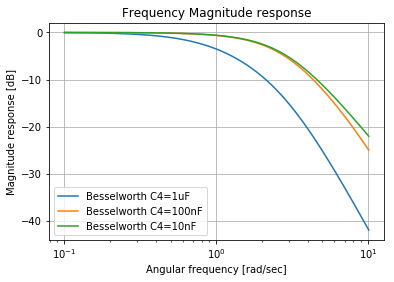

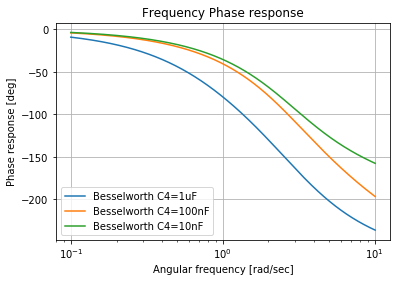

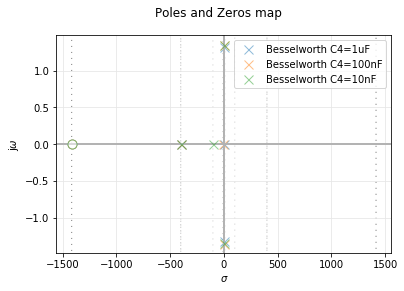

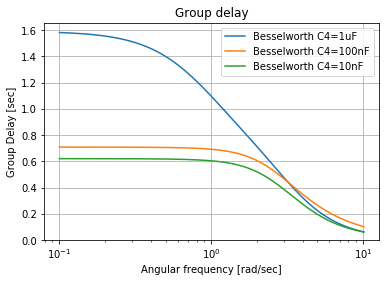

In [5]:
#!/usr/bin/env python2
# -*- coding: utf-8 -*-
"""
Created on Thu Sep 20 18:30:41 2018

@author: tiago
"""
import numpy as np
import scipy.signal as sig
#import matplotlib as mpl
from splane import analyze_sys


#vectores auxiliares para imprimir los graficos de los sistemas
all_sys = []
filter_names = []

# Constantes del filtro Besselworth
fc = 40

# Constatens del filtro Butterworth y Bessel
order2analyze = 4


#____________Besselworth____________

#Coeficientes de la transferencia obtenida con Tina normalizada con C4 = 1uF (1)
num1 = [(2.81*10**(-6))*(fc*2*np.pi), 1]
den1 = [(7.21*10**(-14))*((fc*2*np.pi)**4), (7.38*10**(-9))*((fc*2*np.pi)**3), 
       (1.14*10**(-5))*((fc*2*np.pi)**2), (6.33*10**(-3))*(fc*2*np.pi), 1]

#Coeficientes de la transferencia obtenida con Tina normalizada con C4 = 100nf (2)
num2 = [(2.81*10**(-6))*(fc*2*np.pi), 1]
den2 = [(7.21*10**(-15))*((fc*2*np.pi)**4), (7.54*10**(-10))*((fc*2*np.pi)**3),
       (2.84*10**(-6))*((fc*2*np.pi)**2), (2.82*10**(-3))*(fc*2*np.pi), 1]

#Coeficientes de la transferencia obtenida con Tina normalizada con C4 = 10nf (3)
num3 = [(2.81*10**(-6))*(fc*2*np.pi), 1]
den3 = [(7.21*10**(-16))*((fc*2*np.pi)**4), (9.21*10**(-11))*((fc*2*np.pi)**3),
       (1.98*10**(-6))*((fc*2*np.pi)**2), (2.47*10**(-3))*(fc*2*np.pi), 1]

tf1 = sig.TransferFunction(num1, den1)
tf2 = sig.TransferFunction(num2, den2)
tf3 = sig.TransferFunction(num3, den3)

print("\n\n_______________________________________________________________________")
print ("**Filtro 1 (C4 = 1uF)**")
print ("\n*Coeficientes de la transferencia:\n")
print ("\tNumerador:")
for c in tf1.num:
    print(f"\t\t{c:.3f}")
print ("\tDenominador:")
for c in tf1.den:
    print(f"\t\t{c:.3f}")
print ("\n")

print ("*Polos y ceros de la transferencia:\n")
print ("\tPolos:")
for c in tf1.poles:
    print(f"\t\t{c:.3f}")
print ("\tCeros:")
for c in tf1.zeros:
    print(f"\t\t{c:.3f}")
    
print("\n\n_______________________________________________________________________")
print ("**Filtro 2 (C4 = 100nF)")    
print ("\n*Coeficientes de la transferencia:\n")
print ("\tNumerador:")
for c in tf2.num:
    print(f"\t\t{c:.3f}")
print ("\tDenominador:")
for c in tf2.den:
    print(f"\t\t{c:.3f}")
print ("\n")

print ("*Polos y ceros de la transferencia:\n")
print ("\tPolos:")
for c in tf2.poles:
    print(f"\t\t{c:.3f}")
print ("\tCeros:")
for c in tf2.zeros:
    print(f"\t\t{c:.3f}")
    
print("\n\n_______________________________________________________________________")
print ("**Filtro 3 (C4 = 10nF)")    
print ("\n*Coeficientes de la transferencia:\n")
print ("\tNumerador:")
for c in tf3.num:
    print(f"\t\t{c:.3f}")
print ("\tDenominador:")
for c in tf3.den:
    print(f"\t\t{c:.3f}")
print ("\n")

print ("*Polos y ceros de la transferencia:\n")
print ("\tPolos:")
for c in tf3.poles:
    print(f"\t\t{c:.3f}")
print ("\tCeros:")
for c in tf3.zeros:
    print(f"\t\t{c:.3f}")


all_sys.append(tf1)
filter_names.append("Besselworth C4=1uF")
all_sys.append(tf2)
filter_names.append("Besselworth C4=100nF")
all_sys.append(tf3)
filter_names.append("Besselworth C4=10nF")

#Defino el rango a imprimir y el punto a mostrar
ini = 0.1
end = 10.1
n = 100000
bode_lenght = np.linspace(ini, end, n)
printW = 1
#imprimo todos los Bode
analyze_sys( all_sys, filter_names, bode_lenght, printW=printW)

Aquí se pueden ver las diferencias entre los tres circuito analizados. Como se dijo antes, la diferencia entre los dos circuitos propuestos (2-C4=100nF y 3-C4=10nF) y el original del esquemático (1-C4=1uF) es notoria en cuanto a atenuación y retardo de grupo mientras que, entre los circuitos propuestos no hay grandes diferencias.

Se puede ver que el retardo de grupo mejora considerablemente en los circuitos propuestos, especialmente antes de la frecuencia de corte. Esto puede ser un punto a favor si se buscara mantener la forma de la señal en dichas frecuencias. 

En cuanto a la atenuación se puede ver claramente que los circuitos propuestos son peores, mientas que el circuito del esquemático tiene una atenuación de 3.52dB los otros dos no superan los 0.64dB, lo que puede ser perjudicial para el circuito completo si lo que se buscaba era tener una buena atenuación en la frecuencia de corte. Como suponemos que este es el caso, no serían de gran utilidad los cambios propuestos.

# Conclusión

Se puede ver que este filtro tiene mejor atenuación que un Bessel o incluso un Butterworth en la frecuencia de corte (alrededor de 0.5dB mayor). Esto es un gran punto a favor si se lo mira sin tener en cuenta que el Roll-off del filtro Besselworth es peor a los otros dos.

![Roll-off1](./images/graphics/conclusion1_rolloff.png)
![Roll-off2](./images/graphics/conclusion2_rolloff.png)
![Roll-off3](./images/graphics/conclusion3_rolloff.png)

La atenuación del Besselworth (en este caso el circuito original del esquemático) aumenta mucho mas rapido que las otras dos aproximaciones antes de la frecuencia de corte, lo cual no es un punto que por lo general sea deseado en los filtros. Y luego de la misma, tarda mucho en llegar a su pendiente de atenuación máxima. 

De esta forma, las señales de frecuencia cercanas a la frecuencia de corte por izquierda son atenuadas sin tener que serlo y las frecuencias cercanas por derecha no son suficientemente atenuadas.

Por otro lado, el retardo de grupo no es mucho mejor al de un filtro Bessel convencional. Si bien los otros dos filtros propuestos mejoraban el valor del retardo de grupo en sí, no mejoraban considerablemente la no variabilidad del mismo, que en definitiva es lo que se busca.

![retardo](./images/graphics/conclusion4_retardo.png)

Teniendo en cuenta estas consideraciones, si se tuviera que realizar este circuito, nuestro grupo optaría por realizarlo con un filtro Bessel de 4 orden y no con un Besselworth.

#### PD:

Se puede ver el esquematico completo del shield [aca](./shield.pdf).